In [4]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import csv
import random
from matplotlib import pyplot as plt
import math
from tqdm import tqdm

import plotly.graph_objects as go

In [5]:
# Read In csvs
games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/games.csv")
plays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/plays.csv")
players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/players.csv")
_weeks = []
for i in [5,6,7,8]:
    filename = '../input/nfl-big-data-bowl-2023/week'+str(i)+'.csv'
    _weeks.append(pd.read_csv(filename))
weeks = pd.concat(_weeks)
pffScoutingData = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/pffScoutingData.csv")
joined_all = pd.merge(games,plays,how="inner",on = "gameId")
joined_all = pd.merge(joined_all,weeks,how="inner",on=["gameId","playId"])
# left join on players to keep football records
joined_all = pd.merge(joined_all,players,how="left",on = "nflId")
play_focus = 97
focused_df = joined_all[(joined_all.playId==play_focus)]

#tiptoe
tiptoe = pd.read_csv ('/kaggle/input/tiptoe/TIPTOE_week5-8.csv')
tiptoe['aTTTOE'] = tiptoe.TTTOE - tiptoe.TTTOE.mean()
snap = tiptoe.groupby(['gameId','playId']).min().frameId.reset_index().rename(columns={'frameId':'snap'})
tiptoe = pd.merge(tiptoe,snap,how='left')
tiptoe['frame_snap'] = tiptoe.frameId - tiptoe.snap
tiptoepp = tiptoe.groupby(['gameId','playId','nflId']).sum().reset_index()

tiptoepp = pd.merge(tiptoepp,weeks.loc[weeks.frameId==1][['gameId','playId','nflId','team']],how='left')

pff_cols = ['gameId','playId','nflId',
            'pff_hit','pff_hurry','pff_sack',
            'pff_hitAllowed','pff_hurryAllowed','pff_sackAllowed','pff_role']
tiptoepp = pd.merge(tiptoepp,pffScoutingData[pff_cols],how='left')

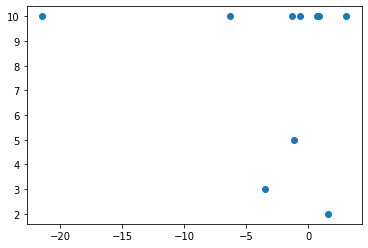

In [6]:
tiptoeppd = pd.merge(tiptoepp,plays[['gameId','playId','down','yardsToGo']],how='left')
thead = tiptoeppd.loc[tiptoeppd['pff_role']=='Pass Rush'].sample(10)
plt.scatter(thead.TTTOE.values,thead.yardsToGo.values)

In [7]:
thead

,gameId,playId,nflId,frameId,TTTOE,aTTTOE,snap,frame_snap,team,pff_hit,pff_hurry,pff_sack,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_role,down,yardsToGo
23704,2021103103,1080,44847.0,1416,0.814335,7.552717,288,1128,CLE,0.0,0.0,1.0,NaN,NaN,NaN,Pass Rush,2,10
19953,2021102407,3443,47889.0,518,3.056120,6.986843,140,378,LV,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush,2,10
9741,2021101702,2352,41341.0,368,1.600591,4.829399,115,253,CAR,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush,3,2
19798,2021102407,1991,38542.0,726,-1.298044,3.334594,198,528,PHI,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush,1,10
15546,2021102100,3394,44847.0,615,0.664929,4.876417,180,435,CLE,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush,1,10
5055,2021101008,3261,34465.0,391,-6.279013,-3.050205,138,253,NO,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush,1,10
19161,2021102406,1305,52475.0,1069,-21.446675,-13.444847,285,784,DET,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush,2,10
8095,2021101400,1171,46081.0,455,-1.171845,2.478112,130,325,TB,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush,3,5
10856,2021101704,3305,45226.0,709,-3.491819,2.825414,225,484,CIN,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush,3,3
16378,2021102401,562,47933.0,975,-0.697014,4.777921,234,741,GB,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush,1,10


In [8]:
colors = {
    'ARI':"#97233F", 
    'ATL':"#A71930", 
    'BAL':'#241773', 
    'BUF':"#00338D", 
    'CAR':"#0085CA", 
    'CHI':"#C83803", 
    'CIN':"#FB4F14", 
    'CLE':"#311D00", 
    'DAL':'#003594',
    'DEN':"#FB4F14", 
    'DET':"#0076B6", 
    'GB':"#203731", 
    'HOU':"#03202F", 
    'IND':"#002C5F", 
    'JAX':"#9F792C", 
    'KC':"#E31837", 
    'LA':"#003594", 
    'LAC':"#0080C6", 
    'LV':"#000000",
    'MIA':"#008E97", 
    'MIN':"#4F2683", 
    'NE':"#002244", 
    'NO':"#D3BC8D", 
    'NYG':"#0B2265", 
    'NYJ':"#125740", 
    'PHI':"#004C54", 
    'PIT':"#FFB612", 
    'SEA':"#69BE28", 
    'SF':"#AA0000",
    'TB':'#D50A0A', 
    'TEN':"#4B92DB", 
    'WAS':"#5A1414", 
    'football':'#CBB67C'
}

Text(0.5, 1.0, 'Team TATOX')

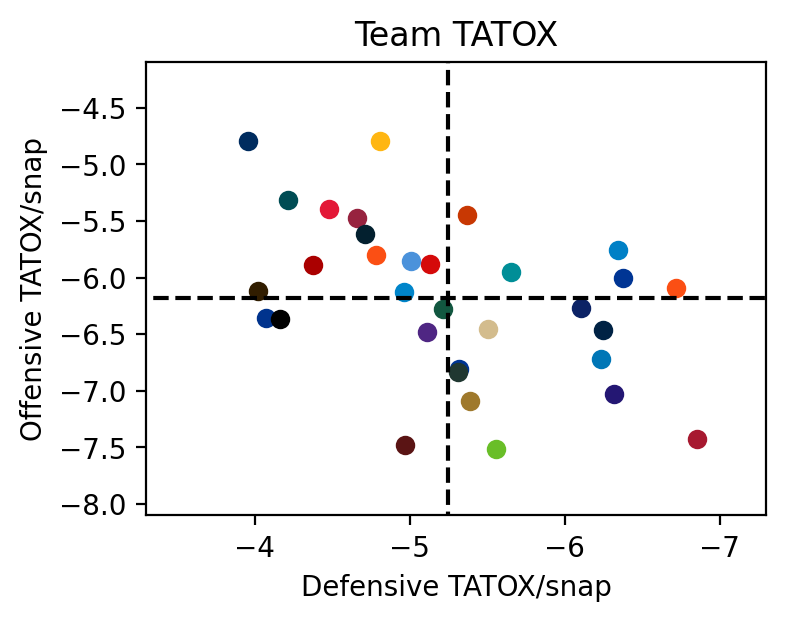

In [11]:
plt.figure(figsize=(4,3),dpi=200)
team_stat = tiptoepp.groupby(['team','pff_role']).mean()['TTTOE'].reset_index()
for t in team_stat.team.unique():
    targ_team = team_stat.loc[team_stat.team==t]
    plt.scatter(targ_team.loc[targ_team.pff_role=='Pass Rush']['TTTOE'].values[0],
                targ_team.loc[targ_team.pff_role=='Pass Block']['TTTOE'].values[0],
                color=colors[t])

avg_off = team_stat.loc[team_stat.pff_role=='Pass Block']['TTTOE'].values.mean()
avg_def = team_stat.loc[team_stat.pff_role=='Pass Rush']['TTTOE'].values.mean()
plt.plot([-7.5,-3],[avg_off,avg_off],'k--')
plt.plot([avg_def,avg_def],[-8.2,-4],'k--')
plt.xlabel('Defensive TATOX/snap')
plt.ylabel('Offensive TATOX/snap')
plt.xlim([-3.3,-7.3])
plt.ylim([-8.1,-4.1])
plt.title('Team TATOX')

In [12]:
team_stat.loc[team_stat['pff_role']=='Pass Rush'].sort_values('TTTOE',ascending=True)

,team,pff_role,TTTOE
3,ATL,Pass Rush,-6.851535
19,DEN,Pass Rush,-6.717363
33,LA,Pass Rush,-6.376241
35,LAC,Pass Rush,-6.346281
5,BAL,Pass Rush,-6.318305
43,NE,Pass Rush,-6.249713
21,DET,Pass Rush,-6.234350
47,NYG,Pass Rush,-6.104349
39,MIA,Pass Rush,-5.655890
55,SEA,Pass Rush,-5.556094


In [13]:
tiptoepp

,gameId,playId,nflId,frameId,TTTOE,aTTTOE,snap,frame_snap,team,pff_hit,pff_hurry,pff_sack,pff_hitAllowed,pff_hurryAllowed,pff_sackAllowed,pff_role
0,2021100700,95,30869.0,1734,-10.236783,0.011172,438,1296,LA,NaN,NaN,NaN,0.0,0.0,0.0,Pass Block
1,2021100700,95,35562.0,1734,-4.468862,5.779094,438,1296,SEA,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush
2,2021100700,95,41786.0,1734,-8.939166,1.308790,438,1296,SEA,0.0,0.0,0.0,NaN,NaN,NaN,Pass Rush
3,2021100700,95,42400.0,1734,-16.277465,-6.029510,438,1296,LA,NaN,NaN,NaN,0.0,0.0,0.0,Pass Block
4,2021100700,95,46102.0,1734,-24.114875,-13.866919,438,1296,LA,NaN,NaN,NaN,0.0,0.0,0.0,Pass Block
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29438,2021110100,4433,43695.0,1363,-6.310289,0.287710,282,1081,NYG,NaN,NaN,NaN,0.0,0.0,1.0,Pass Block
29439,2021110100,4433,46090.0,1363,-1.210733,5.387266,282,1081,NYG,NaN,NaN,NaN,0.0,0.0,0.0,Pass Block
29440,2021110100,4433,46103.0,1363,-6.337577,0.260422,282,1081,NYG,NaN,NaN,NaN,0.0,0.0,0.0,Pass Block
29441,2021110100,4433,52507.0,1363,-6.531357,0.066642,282,1081,NYG,NaN,NaN,NaN,0.0,1.0,0.0,Pass Block


In [14]:
_aTTTOE = tiptoe[['gameId','playId','nflId','aTTTOE']].groupby(['gameId','playId','nflId']).sum().reset_index()[['gameId','playId','nflId','aTTTOE']]
aTTTOE_0 = tiptoe.loc[tiptoe.frame_snap < 10][['gameId','playId','nflId','aTTTOE']].groupby(['gameId','playId','nflId']).sum().reset_index()[['gameId','playId','nflId','aTTTOE']].rename(columns={'aTTTOE':'under1'})
aTTTOE_1 = tiptoe.loc[(tiptoe.frame_snap >= 10)&(tiptoe.frame_snap < 20)][['gameId','playId','nflId','aTTTOE']].groupby(['gameId','playId','nflId']).sum().reset_index()[['gameId','playId','nflId','aTTTOE']].rename(columns={'aTTTOE':'1to2'})
aTTTOE_2 = tiptoe.loc[(tiptoe.frame_snap >= 20)&(tiptoe.frame_snap < 30)][['gameId','playId','nflId','aTTTOE']].groupby(['gameId','playId','nflId']).sum().reset_index()[['gameId','playId','nflId','aTTTOE']].rename(columns={'aTTTOE':'2to3'})
aTTTOE_3 = tiptoe.loc[(tiptoe.frame_snap >= 30)&(tiptoe.frame_snap < 40)][['gameId','playId','nflId','aTTTOE']].groupby(['gameId','playId','nflId']).sum().reset_index()[['gameId','playId','nflId','aTTTOE']].rename(columns={'aTTTOE':'3to4'})
aTTTOE_4 = tiptoe.loc[tiptoe.frame_snap > 40][['gameId','playId','nflId','aTTTOE']].groupby(['gameId','playId','nflId']).sum().reset_index()[['gameId','playId','nflId','aTTTOE']].rename(columns={'aTTTOE':'over4'})

_aTTTOE = _aTTTOE.merge(aTTTOE_0,how='left')
_aTTTOE = _aTTTOE.merge(aTTTOE_1,how='left')
_aTTTOE = _aTTTOE.merge(aTTTOE_2,how='left')
_aTTTOE = _aTTTOE.merge(aTTTOE_3,how='left')
_aTTTOE = _aTTTOE.merge(aTTTOE_4,how='left')
aTTTOE = _aTTTOE.groupby(['nflId']).mean().reset_index()[['nflId','aTTTOE','under1','1to2','2to3','3to4','over4']].merge(players[['nflId','officialPosition','displayName']], how='left')
play_count = _aTTTOE['nflId'].value_counts().reset_index().rename({'nflId': 'play_count', 'index': 'nflId'}, axis=1)
aTTTOE = aTTTOE.merge(play_count, how='left')
aTTTOE.loc[(aTTTOE['play_count'] > 30) & (aTTTOE['officialPosition'].isin(['T']))].sort_values('2to3', ascending=False).reset_index(drop=True).head(20)
#plt.scatter(aTTTOE['aTTTOE'],aTTTOE['2to3'])

,nflId,aTTTOE,under1,1to2,2to3,3to4,over4,officialPosition,displayName,play_count
0,52938.0,1.421556,-0.535127,0.600224,1.138580,0.756918,0.681002,T,Terence Steele,97
1,37082.0,1.613381,-0.526793,0.792857,1.131427,0.719581,0.632187,T,Tyron Smith,67
2,53522.0,1.439168,-1.027907,0.748761,1.051316,1.108668,0.840505,T,Spencer Brown,50
3,52507.0,0.416829,-1.101502,0.664379,1.037183,-0.104528,0.495920,T,Matt Peart,88
4,43586.0,0.713384,-1.036935,0.421870,0.977934,0.601908,2.290566,T,George Fant,69
5,38642.0,1.926065,-0.618847,1.101457,0.966271,1.178761,1.248493,T,Bobby Massie,122
6,52553.0,-0.519038,-1.963455,0.066116,0.964724,1.021492,1.794507,T,Jack Driscoll,61
7,52426.0,0.386244,-0.986777,0.098042,0.962374,1.220441,0.822395,T,Austin Jackson,120
8,52516.0,-0.746356,-2.614360,0.287989,0.925113,1.087959,1.383221,T,Saahdiq Charles,34
9,53452.0,-0.991862,-1.914405,-0.296238,0.913164,0.796669,1.771355,T,Christian Darrisaw,65


In [15]:
#TODO:
# Add Useful Player Labels
# Add ability to keep or remove the extra stuff (line markers etc)
# Add Team Colors to dict
# Turn into Function 

def animate_play(tracking_df, play_df,players,pffScoutingData, gameId,playId):
    selected_play_df = play_df[(play_df.playId==playId)&(play_df.gameId==gameId)].copy()
    
    tracking_players_df = pd.merge(tracking_df,players,how="left",on = "nflId")
    tracking_players_df = pd.merge(tracking_players_df,pffScoutingData,how="left",on = ["nflId","playId","gameId"])
    selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()

    sorted_frame_list = selected_tracking_df.frameId.unique()
    sorted_frame_list.sort()

    # get play General information 
    line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
    first_down_marker = line_of_scrimmage + selected_play_df.yardsToGo.values[0]
    down = selected_play_df.down.values[0]
    quarter = selected_play_df.quarter.values[0]
    gameClock = selected_play_df.gameClock.values[0]
    playDescription = selected_play_df.playDescription.values[0]
    # Handle case where we have a really long Play Description and want to split it into two lines
    if len(playDescription.split(" "))>15 and len(playDescription)>115:
        playDescription = " ".join(playDescription.split(" ")[0:16]) + "<br>" + " ".join(playDescription.split(" ")[16:])

    # initialize plotly start and stop buttons for animation
    updatemenus_dict = [
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 100, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 0}}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                      "mode": "immediate",
                                      "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }
    ]
    # initialize plotly slider to show frame position in animation
    sliders_dict = {
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Frame:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": []
    }


    frames = []
    for frameId in sorted_frame_list:
        data = []
        # Add Numbers to Field 
        data.append(
            go.Scatter(
                x=np.arange(20,110,10), 
                y=[5]*len(np.arange(20,110,10)),
                mode='text',
                text=list(map(str,list(np.arange(20, 61, 10)-10)+list(np.arange(40, 9, -10)))),
                textfont_size = 30,
                textfont_family = "Courier New, monospace",
                textfont_color = "#ffffff",
                showlegend=False,
                hoverinfo='none'
            )
        )
        data.append(
            go.Scatter(
                x=np.arange(20,110,10), 
                y=[53.5-5]*len(np.arange(20,110,10)),
                mode='text',
                text=list(map(str,list(np.arange(20, 61, 10)-10)+list(np.arange(40, 9, -10)))),
                textfont_size = 30,
                textfont_family = "Courier New, monospace",
                textfont_color = "#ffffff",
                showlegend=False,
                hoverinfo='none'
            )
        )
        # Add line of scrimage 
        data.append(
            go.Scatter(
                x=[line_of_scrimmage,line_of_scrimmage], 
                y=[0,53.5],
                line_dash='dash',
                line_color='blue',
                showlegend=False,
                hoverinfo='none'
            )
        )
        # Add First down line 
        data.append(
            go.Scatter(
                x=[first_down_marker,first_down_marker], 
                y=[0,53.5],
                line_dash='dash',
                line_color='yellow',
                showlegend=False,
                hoverinfo='none'
            )
        )
        # Plot Players
        for team in selected_tracking_df.team.unique():
            _plot_df = selected_tracking_df[(selected_tracking_df.team==team)&(selected_tracking_df.frameId==frameId)].copy()
            if team != "football":
                plot_df = _plot_df.loc[_plot_df['pff_role'].isin(['Pass Rush','Pass Block'])]
                plot_df2 = _plot_df.loc[~_plot_df['pff_role'].isin(['Pass Rush','Pass Block'])]
                hover_text_array=[]
                for nflId in plot_df.nflId:
                    selected_player_df = plot_df[plot_df.nflId==nflId]
                    one_play = tiptoe.loc[(tiptoe['gameId']==gameId) &
                                          (tiptoe['playId']==playId) & 
                                          (tiptoe['nflId']==nflId)]
                    hover_text_array.append("nflId:{}<br>displayName:{}<br>Position:{}<br>Role:{}<br>TIPTOE:{}".format(selected_player_df["nflId"].values[0],
                                                                                      selected_player_df["displayName"].values[0],
                                                                                      selected_player_df["pff_positionLinedUp"].values[0],
                                                                                      selected_player_df["pff_role"].values[0],
                                                                                      round(one_play.TTTOE.sum(),2)))
                data.append(go.Scatter(x=plot_df["x"], y=plot_df["y"],mode = 'markers',marker_color=colors[team],opacity=1,name=team,hovertext=hover_text_array,hoverinfo="text"))
                hover_text_array=[]
                for nflId in plot_df2.nflId:
                    selected_player_df = plot_df2[plot_df2.nflId==nflId]
                    hover_text_array.append("nflId:{}<br>displayName:{}<br>Position:{}<br>Role:{}".format(selected_player_df["nflId"].values[0],
                                                                                      selected_player_df["displayName"].values[0],
                                                                                      selected_player_df["pff_positionLinedUp"].values[0],
                                                                                      selected_player_df["pff_role"].values[0]))
                data.append(go.Scatter(x=plot_df2["x"], y=plot_df2["y"],mode = 'markers',marker_color=colors[team],opacity=0.4,name=team,hovertext=hover_text_array,hoverinfo="text"))
            
            else:
                data.append(go.Scatter(x=_plot_df["x"], y=_plot_df["y"],mode = 'markers',marker_color=colors[team],name=team,hoverinfo='none'))
        # add frame to slider
        slider_step = {"args": [
            [frameId],
            {"frame": {"duration": 100, "redraw": False},
             "mode": "immediate",
             "transition": {"duration": 0}}
        ],
            "label": str(frameId),
            "method": "animate"}
        sliders_dict["steps"].append(slider_step)
        frames.append(go.Frame(data=data, name=str(frameId)))

    scale=10
    layout = go.Layout(
        autosize=False,
        width=120*scale,
        height=60*scale,
        xaxis=dict(range=[0, 120], autorange=False, tickmode='array',tickvals=np.arange(10, 111, 5).tolist(),showticklabels=False),
        yaxis=dict(range=[0, 53.3], autorange=False,showgrid=False,showticklabels=False),

        plot_bgcolor='#00B140',
        # Create title and add play description at the bottom of the chart for better visual appeal
        title=f"GameId: {gameId}, PlayId: {playId}<br>{gameClock} {quarter}Q"+"<br>"*19+f"{playDescription}",
        updatemenus=updatemenus_dict,
        sliders = [sliders_dict]
    )

    fig = go.Figure(
        data=frames[0]["data"],
        layout= layout,
        frames=frames[1:]
    )
    # Create First Down Markers 
    for y_val in [0,53]:
        fig.add_annotation(
                x=first_down_marker,
                y=y_val,
                text=str(down),
                showarrow=False,
                font=dict(
                    family="Courier New, monospace",
                    size=16,
                    color="black"
                    ),
                align="center",
                bordercolor="black",
                borderwidth=2,
                borderpad=4,
                bgcolor="#ff7f0e",
                opacity=1
                )

    return fig

In [16]:
def get_per_play(df):
    df_pp = df.groupby(['gameId','playId','nflId']).sum().reset_index()
    df_pp = df_pp.merge(plays[['gameId','playId','dropBackType']], how='left')
    df_pp = df_pp.loc[df_pp['dropBackType']=='TRADITIONAL']
    df_pp = df_pp['aTTTOE'].mean()
    return df_pp

def tiptoe_report(nid):
    player_tiptoe = tiptoe.loc[tiptoe['nflId']==nid]
    ptoe_0 = player_tiptoe.loc[player_tiptoe['frame_snap'] <= 10]
    ptoe_1 = player_tiptoe.loc[(player_tiptoe['frame_snap'] > 10)&
                               (player_tiptoe['frame_snap'] <= 20)]
    ptoe_2 = player_tiptoe.loc[(player_tiptoe['frame_snap'] > 20)&
                               (player_tiptoe['frame_snap'] <= 30)]
    ptoe_3 = player_tiptoe.loc[(player_tiptoe['frame_snap'] > 30)&
                               (player_tiptoe['frame_snap'] <= 40)]
    ptoe_4 = player_tiptoe.loc[player_tiptoe['frame_snap'] > 40]
    
    print('< 1 s:\t' + str(get_per_play(ptoe_0)))
    print('1-2 s:\t' + str(get_per_play(ptoe_1)))
    print('2-3 s:\t' + str(get_per_play(ptoe_2)))
    print('3-4 s:\t' + str(get_per_play(ptoe_3)))
    print('> 4 s:\t' + str(get_per_play(ptoe_4)))
    
tiptoe_report(43308.0)

< 1 s:	-5.9153565152137535
1-2 s:	0.5024392736303205
2-3 s:	0.366805854065313
3-4 s:	0.5705798134513339
> 4 s:	0.2733828980460793


In [17]:
tiptoe_play = tiptoe.groupby(['gameId','playId','nflId']).sum().reset_index()
tiptoe_play = tiptoe_play.merge(plays[['gameId','playId','dropBackType']], how='left')
tiptoe_play = tiptoe_play.loc[tiptoe_play['dropBackType']=='TRADITIONAL']
#lq = tiptoe_play['aTTTOE'].quantile(0.01)
#uq = tiptoe_play['aTTTOE'].quantile(0.99)
#avg_tiptoe_play = tiptoe_play.loc[(tiptoe_play['aTTTOE'] < uq) &
                                  #(tiptoe_play['aTTTOE'] > lq)
                                 #].groupby(['nflId']).mean().reset_index()[['nflId','TTTOE']].merge(players, how='left')

avg_tiptoe_play =  tiptoe_play.groupby(['nflId']).mean().reset_index()[['nflId','TTTOE']].merge(players, how='left')
avg_tiptoe_play.loc[avg_tiptoe_play['officialPosition'].isin(['DT','DE','OLB'])].sort_values('TTTOE', ascending=True).head(20)

,nflId,TTTOE,height,weight,birthDate,collegeName,officialPosition,displayName
805,52511.0,-18.038757,6-2,225,1998-08-05,Colorado,OLB,Davion Taylor
840,52591.0,-15.307336,6-5,233,1998-04-01,Penn State,OLB,Cam Brown
112,40463.0,-14.231545,6-3,263,1991-07-02,Pennsylvania,OLB,Brandon Copeland
478,46088.0,-13.931790,6-4,256,1996-02-08,Boise State,OLB,Leighton Vander Esch
982,53668.0,-12.246924,6-4,257,NaN,NaN,OLB,Jonathon Cooper
190,42368.0,-12.207918,6-0,230,1994-04-21,Washington,OLB,Shaq Thompson
251,42869.0,-12.035961,6-1,254,1993-06-27,Stanford,OLB,James Vaughters
969,53611.0,-11.719536,6-4,268,NaN,NaN,OLB,Adetokunbo Ogundeji
553,46229.0,-11.507847,6-1,253,1995-04-24,Oklahoma,OLB,Ogbonnia Okoronkwo
350,43854.0,-11.418007,6-4,263,1993-07-31,Stanford,OLB,Brennan Scarlett


In [19]:
play_count = tiptoe_play['nflId'].value_counts().reset_index().rename({'nflId': 'play_count', 'index': 'nflId'}, axis=1)
avg_tiptoe_play = avg_tiptoe_play.merge(play_count, how='left')
top_OL = avg_tiptoe_play.loc[(avg_tiptoe_play['play_count'] >= 40) & 
                    (avg_tiptoe_play['officialPosition'].isin(['C']))
                   ].sort_values('TTTOE', ascending=False)
top_DL = avg_tiptoe_play.loc[(avg_tiptoe_play['play_count'] >= 40) & 
                    (avg_tiptoe_play['officialPosition'].isin(['DE','OLB']))
                   ].sort_values('TTTOE', ascending=True)
#plt.scatter(top_OL.weight,top_OL.TTTOE)

top_OL = top_OL.reset_index()
top_DL = top_DL.reset_index()
#top_OL.loc[top_OL['displayName']=='Liam Eichenberg']
top_DL.head(10)

,index,nflId,TTTOE,height,weight,birthDate,collegeName,officialPosition,displayName,play_count
0,969,53611.0,-11.719536,6-4,268,NaN,NaN,OLB,Adetokunbo Ogundeji,40
1,553,46229.0,-11.507847,6-1,253,1995-04-24,Oklahoma,OLB,Ogbonnia Okoronkwo,46
2,272,43308.0,-11.160010,6-3,267,1994-06-17,Clemson,DE,Shaq Lawson,47
3,712,48089.0,-10.658426,6-2,235,1996-08-05,Nevada,OLB,Malik Reed,85
4,25,37087.0,-10.496926,6-4,257,1990-05-18,North Carolina,OLB,Robert Quinn,46
5,776,52468.0,-10.474501,6-2,250,1998-09-18,Michigan,OLB,Josh Uche,50
6,320,43435.0,-10.392990,6-3,261,1992-08-15,Grand Valley State,OLB,Matt Judon,91
7,372,44834.0,-10.254213,6-3,250,1995-03-06,Missouri,OLB,Charles Harris,61
8,615,47790.0,-10.133372,6-5,262,1997-07-13,Kentucky,OLB,Josh Allen,61
9,265,43298.0,-10.090012,6-5,240,1992-09-08,Georgia,OLB,Leonard Floyd,67


In [27]:
top_DL.head(15)

,index,nflId,TTTOE,height,weight,birthDate,collegeName,officialPosition,displayName,play_count
0,969,53611.0,-11.719536,6-4,268,NaN,NaN,OLB,Adetokunbo Ogundeji,40
1,553,46229.0,-11.507847,6-1,253,1995-04-24,Oklahoma,OLB,Ogbonnia Okoronkwo,46
2,272,43308.0,-11.160010,6-3,267,1994-06-17,Clemson,DE,Shaq Lawson,47
3,712,48089.0,-10.658426,6-2,235,1996-08-05,Nevada,OLB,Malik Reed,85
4,25,37087.0,-10.496926,6-4,257,1990-05-18,North Carolina,OLB,Robert Quinn,46
5,776,52468.0,-10.474501,6-2,250,1998-09-18,Michigan,OLB,Josh Uche,50
6,320,43435.0,-10.392990,6-3,261,1992-08-15,Grand Valley State,OLB,Matt Judon,91
7,372,44834.0,-10.254213,6-3,250,1995-03-06,Missouri,OLB,Charles Harris,61
8,615,47790.0,-10.133372,6-5,262,1997-07-13,Kentucky,OLB,Josh Allen,61
9,265,43298.0,-10.090012,6-5,240,1992-09-08,Georgia,OLB,Leonard Floyd,67


In [ ]:
top_OL.head(10)

In [ ]:
tiptoe_play.sort_values('aTTTOE', ascending=True).head(30)

In [52]:
gid = 2021101700
pid = 2904

animate_play(weeks,plays,players,pffScoutingData,gid,pid).show()

5


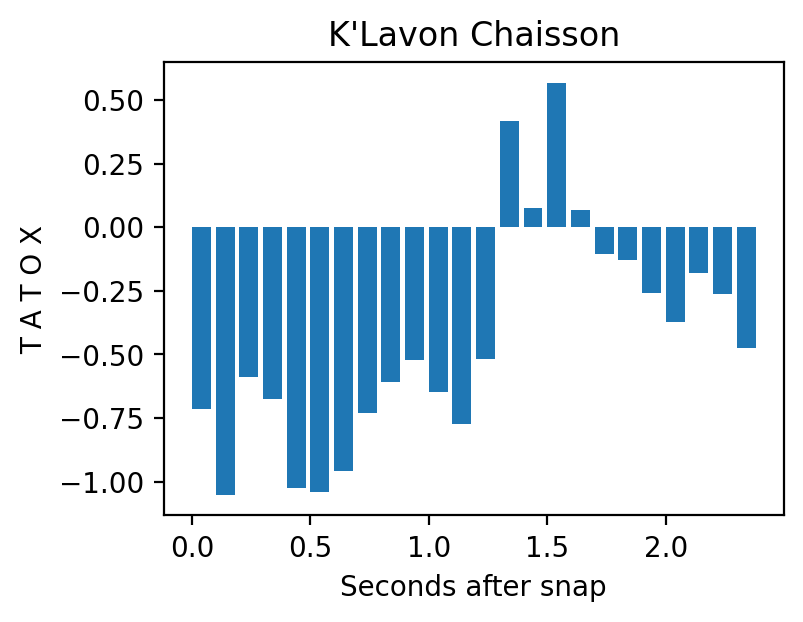

In [74]:
plt.figure(figsize=(4,3),dpi=200)
one_play = tiptoe.loc[(tiptoe['gameId']==gid) &
           (tiptoe['playId']==pid) & 
           (tiptoe['nflId']==52428)]
plt.bar((one_play.frameId.values - one_play.frameId.values[0])/10,one_play.TTTOE.values, align='edge', width=0.08)
#plt.title(one_play.TTTOE.sum())
plt.title("K'Lavon Chaisson")
plt.xlabel('Seconds after snap')
plt.ylabel('T A T O X')
print(one_play.frameId.values[0])

In [75]:
gid_wks = games.loc[(games.week.isin([6]))].gameId.unique()
plays.loc[(plays.defensiveTeam == 'JAX')&(plays.gameId.isin(gid_wks))]

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
5667,2021101700,95,(14:26) (Shotgun) T.Tagovailoa pass short midd...,1,2,11,MIA,JAX,MIA,24,...,NaN,34.0,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Quarters,Zone
5668,2021101700,142,(13:23) (Shotgun) T.Tagovailoa pass short left...,1,3,9,MIA,JAX,MIA,26,...,NaN,36.0,PISTOL,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",TRADITIONAL,0,Cover-3,Zone
5669,2021101700,213,(11:54) T.Tagovailoa pass incomplete short rig...,1,1,10,MIA,JAX,MIA,48,...,NaN,58.0,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,1,Cover-1,Man
5670,2021101700,259,(11:09) (Shotgun) T.Tagovailoa pass short left...,1,3,6,MIA,JAX,JAX,48,...,NaN,62.0,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 3 LB, 6 DB",TRADITIONAL,0,Cover-3,Zone
5671,2021101700,283,(10:26) (Shotgun) T.Tagovailoa pass incomplete...,1,1,10,MIA,JAX,JAX,28,...,NaN,82.0,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"2 DL, 4 LB, 5 DB",DESIGNED_ROLLOUT_LEFT,0,Cover-3,Zone
5672,2021101700,305,(10:22) (Shotgun) T.Tagovailoa pass short righ...,1,2,10,MIA,JAX,JAX,28,...,NaN,82.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone
5673,2021101700,329,(9:43) (Shotgun) T.Tagovailoa pass short left ...,1,3,4,MIA,JAX,JAX,22,...,NaN,88.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"2 DL, 3 LB, 6 DB",TRADITIONAL,0,Cover-1,Man
5674,2021101700,386,(8:31) T.Tagovailoa scrambles left guard to JA...,1,2,7,MIA,JAX,JAX,13,...,NaN,97.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 3 LB, 5 DB",SCRAMBLE_ROLLOUT_LEFT,1,Red Zone,Other
5678,2021101700,695,(3:42) (Shotgun) T.Tagovailoa pass deep right ...,1,1,10,MIA,JAX,MIA,19,...,NaN,29.0,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,1,Cover-2,Zone
5679,2021101700,768,(1:55) J.Brissett pass deep left to D.Smythe t...,1,3,1,MIA,JAX,NaN,50,...,NaN,60.0,SINGLEBACK,"1 RB, 3 TE, 1 WR",8.0,"3 DL, 4 LB, 4 DB",DESIGNED_ROLLOUT_RIGHT,1,Cover-1,Man


| Name|Position|TATOX/snap|No. Snaps|
| --- | --- | --- | --- |
| Raekwon Davis|NT| -5.132969|  40|
| Christian Covington|NT| -4.6531116|  45|
| Jerry Tillery|DT| -4.247023|  68|
| Linval Joseph|NT| -4.098340|  43|
| Christian Wilkins|DT| -3.955759|   57|

774	52464.0	-5.132969	6-7	310	NaN	Alabama	NT	Raekwon Davis	40
238	42559.0	-4.653111	6-2	305	1993-10-16	Rice	NT	Christian Covington	45
633	47811.0	-4.247023	6-6	295	1996-10-08	Notre Dame	DT	Jerry Tillery	68
15	35485.0	-4.098340	6-4	329	1988-10-10	East Carolina	NT	Linval Joseph	43
621	47796.0	-3.955759	6-4	315	1995-12-20	Clemson	DT	Christian Wilkins	57

In [ ]:
0	51	38553.0	-4.289043	6-6	305	1988-12-01	Iowa	T	Riley Reiff	120
1	465	45630.0	-4.378342	6-7	317	1994-05-16	Toledo	T	Storm Norton	83
2	926	53499.0	-4.418117	6-6	297	NaN	NaN	T	Brady Christensen	58
3	944	53539.0	-4.419191	6-5	310	NaN	NaN	T	James Hudson	37
4	471	46078.0	-4.530410	6-8	315	1995-01-12	Notre Dame	T	Mike McGlinchey	61